In [40]:
import requests
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt

In [27]:
def base64_to_pil_image(image_base64: str) -> Image:
    return Image.open(io.BytesIO(base64.decodebytes(bytes(image_base64, "utf-8")))).convert('RGB')

## Определение по входящему изображению топ-5 категорий и топ-5 названий

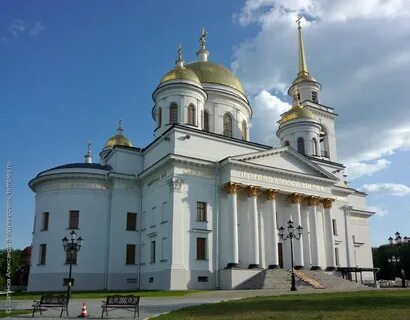

In [134]:
# тестовое изображение

Image.open('test.png').convert('RGB')

In [135]:
response = requests.post(url='http://127.0.0.1:8000/predict_cats_names_by_image',
                        params={
                            "city": 'Нижний Новгород',
                        },
                        files={
                            "image_file": open('test.png', 'rb')
                            })

### Диаграмма распределения вероятностей для пяти наиболее близких категории

In [136]:
cats_dict, names_dict = response.json()
cats = [cat for cat in cats_dict.keys()]
cats_probs = [item[1] for item in cats_dict.items()]

cats

['religion',
 'planetariums',
 'fortifications',
 'puppetries',
 'gardens_and_parks']

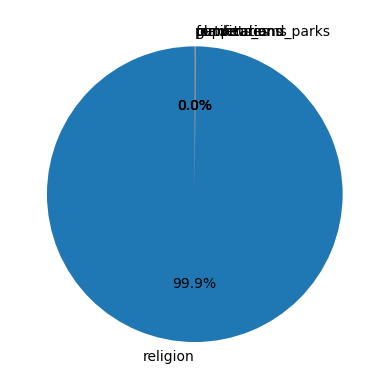

In [137]:
plt.pie(cats_probs, labels=cats, autopct='%1.1f%%', textprops={'fontsize': 10}, startangle=90,)
plt.show()

### Пять наиболее близких названий к входному изображению

In [138]:
names_dict

[{'Place_name': 'Спасо-преображенская церковь',
  'Lon': 43.933346,
  'Lat': 56.256714},
 {'Place_name': 'Храм Сергия Радонежского',
  'Lon': 43.987236,
  'Lat': 56.323441},
 {'Place_name': 'Храм святителей Московских',
  'Lon': 43.997238,
  'Lat': 56.312874},
 {'Place_name': 'Церковь во имя Святого Пророка Божия Илии',
  'Lon': 43.993713,
  'Lat': 56.328205},
 {'Place_name': 'Благовещенский собор', 'Lon': 43.976471, 'Lat': 56.322552}]

## Поиск пяти наиболее близких изображений достопримечательностей к входящему текстовому запросу

In [151]:
response = requests.post(url='http://127.0.0.1:8000/predict_images_by_text',
                        params={
                            "text": 'Парк для прогулки и отдыха',
                            "city": 'Нижний Новгород'
                        })

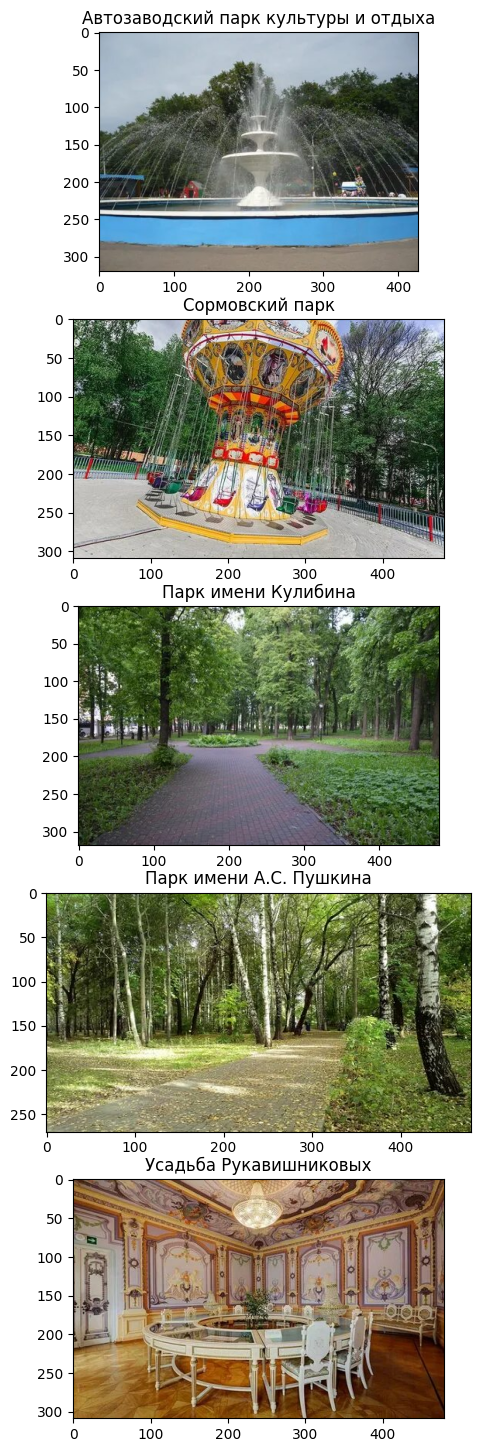

In [153]:
names = [name for name in response.json().keys()]
images = [items[1][0] for items in response.json().items()]

plt.figure(figsize=(10, 18))

for i in range(len(names)):
    plt.subplot(5, 1, i+1)
    plt.title(names[i])
    plt.imshow(base64_to_pil_image(images[i]))